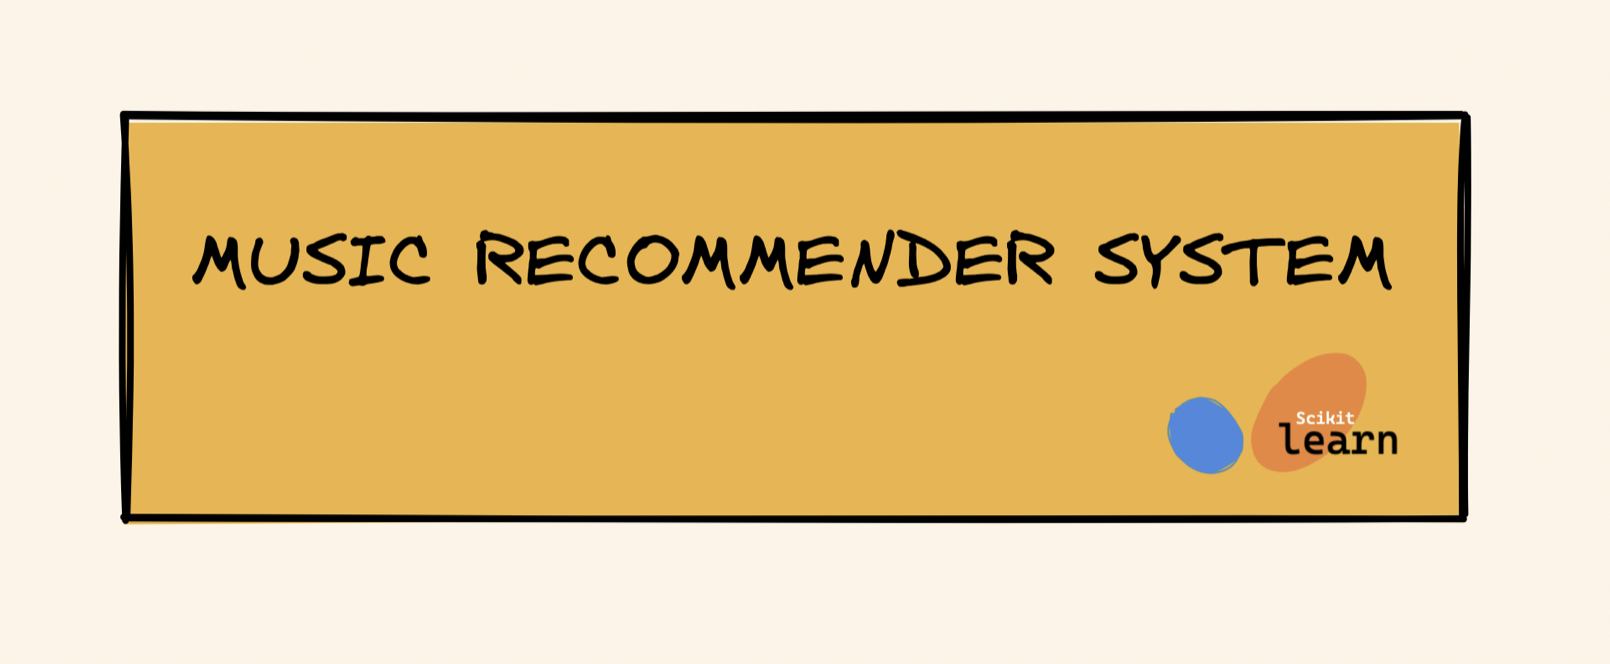

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## DATA LOADING

This dataset is a public dataset from kaggle, it contains over 600k songs from spotify's API from year 1921 to 2020

In [2]:
dataset = pd.read_csv(r'C:\Users\hp\MRSP\data\data.csv')
genreby = pd.read_csv(r'C:\Users\hp\MRSP\data\data_by_genres.csv')
yearby = pd.read_csv(r'C:\Users\hp\MRSP\data\data_by_year.csv')
track = pd.read_csv(r'C:\Users\hp\MRSP\data\tracks.csv')

## **These are the following dataset we would be working with:**

>* Dataset audio features of tracks, original data, 170k rows

>* Track audio features of tracks, 600k rows

>* Yearby audio features of years, derived from data_o.csv, 100 rows

>* Genreby audio features of genres, derived from databyartist_o.csv, 3k rows

In [3]:
dataset.tail(10)

valence  year  acousticness  \
170643   0.9070  2020       0.00952   
170644   0.4660  2020       0.31000   
170645   0.1690  2020       0.99400   
170646   0.5220  2020       0.20400   
170647   0.0838  2020       0.97400   
170648   0.6080  2020       0.08460   
170649   0.7340  2020       0.20600   
170650   0.6370  2020       0.10100   
170651   0.1950  2020       0.00998   
170652   0.6420  2020       0.13200   

                                                  artists  danceability  \
170643  ['DJ Scheme', 'Cordae', 'Ski Mask The Slump Go...         0.917   
170644                                    ['Fleet Foxes']         0.562   
170645                                 ['Ólafur Arnalds']         0.281   
170646                                          ['Gunna']         0.598   
170647                                   ['Najma Wallin']         0.175   
170648  ['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...         0.786   
170649                                       ['Ashnikko']         0.717   
170650                                        ['MAMAMOO']         0.634   
170651                                         ['Eminem']         0.671   
170652                              ['KEVVO', 'J Balvin']         0.856   

        duration_ms   energy  explicit                      id  \
170643       228333  0.56900         1  3C9D1X8NkG2Ak1RaGpRnnQ   
170644       253613  0.68600         0  308prODCCD0O660tIktbUi   
170645       190500  0.03330         0  13MOQ6oQqkrZEDkZOHukCw   
170646       230600  0.47200         1  2f8y4CuG57UJEmkG3ujd0D   
170647       133500  0.00759         0  6RuFOroO9VO0aMGEzirLHk   
170648       301714  0.80800         0  0KkIkfsLEJbrcIhYsCL7L5   
170649       150654  0.75300         0  0OStKKAuXlxA0fMH54Qs6E   
170650       211280  0.85800         0  4BZXVFYCb76Q0Klojq4piV   
170651       337147  0.62300         1  5SiZJoLXp3WOl3J4C8IK0d   
170652       189507  0.72100         1  7HmnJHfs0BkFzX4x8j0hkl   

        instrumentalness  key  liveness  loudness  mode  \
170643          0.000000    7    0.0774   -10.456     1   
170644          0.022500    7    0.1250    -8.480     1   
170645          0.959000    6    0.0995   -31.460     1   
170646          0.000015    0    0.1080   -10.991     1   
170647          0.925000    7    0.1130   -35.072     1   
170648          0.000289    7    0.0822    -3.702     1   
170649          0.000000    7    0.1010    -6.020     1   
170650          0.000009    4    0.2580    -2.226     0   
170651          0.000008    2    0.6430    -7.161     1   
170652          0.004710    7    0.1820    -4.928     1   

                                     name  popularity release_date  \
170643        Soda (feat. Take A Daytrip)          66   2020-11-13   
170644                           Sunblind          66   2020-09-22   
170645  We Contain Multitudes (from home)          70   2020-08-26   
170646             NASTY GIRL / ON CAMERA          66   2020-05-22   
170647                    Med slutna ögon          70   2020-02-21   
170648                              China          72   2020-05-29   
170649        Halloweenie III: Seven Days          68   2020-10-23   
170650                                AYA          76   2020-11-03   
170651                           Darkness          70   2020-01-17   
170652    Billetes Azules (with J Balvin)          74   2020-10-16   

        speechiness    tempo  
170643       0.2790  144.014  
170644       0.0249  103.054  
170645       0.0348   90.250  
170646       0.2580  120.080  
170647       0.0454   70.872  
170648       0.0881  105.029  
170649       0.0605  137.936  
170650       0.0809   91.688  
170651       0.3080   75.055  
170652       0.1080   94.991

In [4]:
dataset.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

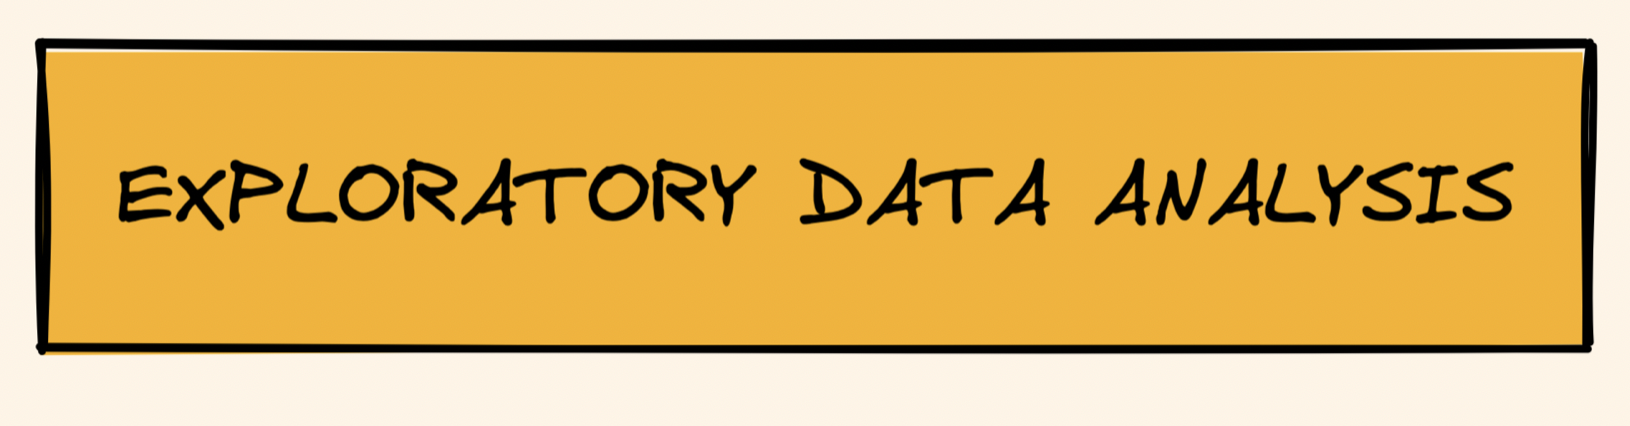

Simply defined, exploratory data analysis (EDA for short) is looking for patterns and summarizing the dataset’s main characteristics beyond what they learn from modeling and hypothesis testing. EDA is a philosophy that allows us to approach a database without assumptions. When a data analyst employs EDA, it’s like they’re asking the data to tell them what they don’t know.

<Axes: xlabel='mode', ylabel='count'>

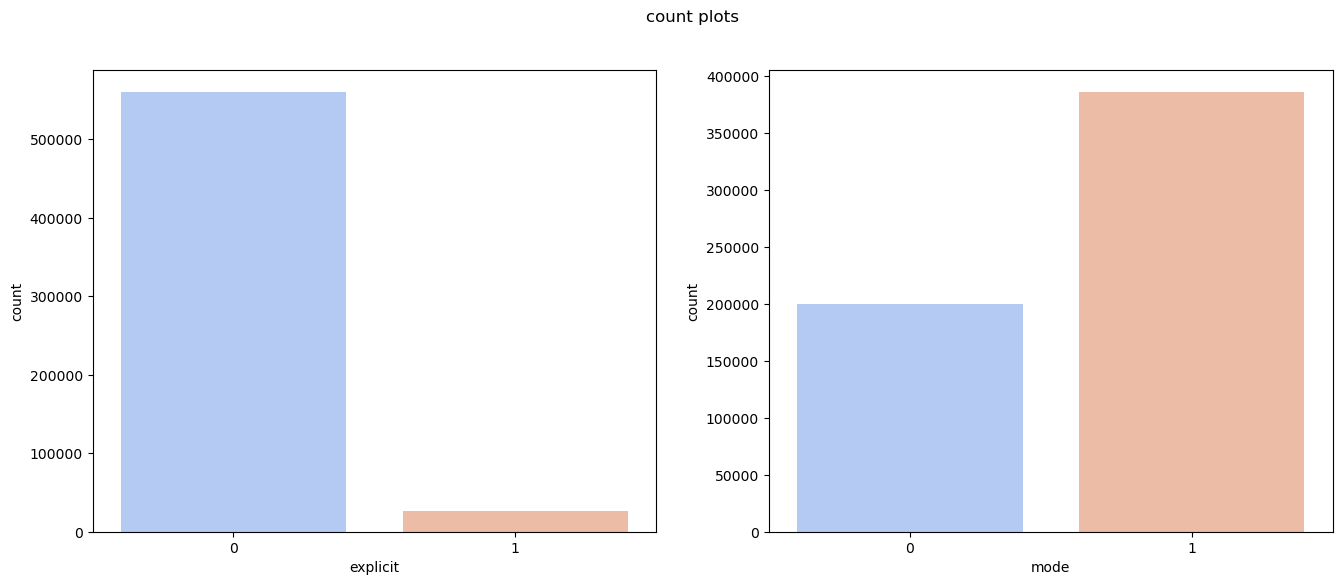

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('count plots')

sns.countplot(ax=axes[0],x='explicit',data=track,palette='coolwarm')
sns.countplot(ax=axes[1],x='mode',data=track,palette='coolwarm')

## **Insights:**

>* From the count plots it is very clear that the number of **explict** songs are quiet few
>* For the **mode** feature classification the major is almost double of minor


### Adding Year Column To Track DataFrame

In [6]:
track['release_date'] = pd.to_datetime(track['release_date'])
track['year'] = track['release_date'].apply(lambda time: time.year)

We First convert the 'release date' column to **date_time** data type (it helps us to extract useful information from the column easily).

Then using the lambda keyword we extract the year from 'release date' column and create a new column **year** for the given DataFrame.

# **Various features & their change in trend with time**

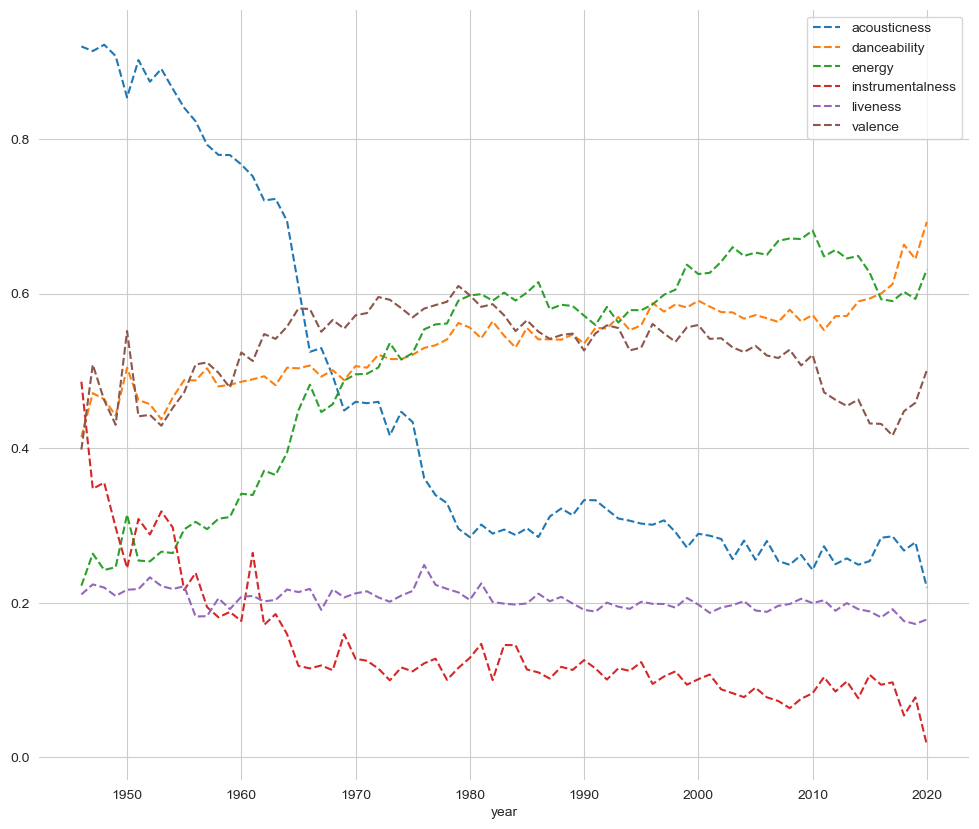

In [7]:
zerotoone = yearby[['acousticness', 'danceability',
                    'energy', 'instrumentalness',
                    'liveness', 'valence','year']]
df = zerotoone.copy()
dfn = df[df.year > 1945]
dfn =dfn.reset_index(drop=True)
dfn.set_index('year',inplace=True)

sns.set_style('whitegrid')
dfn.plot(figsize=(12,10),style='--')
sns.despine(left = True,bottom=True)

### **Key Insights:**

 >* **Acousticness** of songs decreased with time, there was a very sharp drop 1965 to 1975
 >* **Dancebility** of songs increased with time
 >* there was a rapid increase in the **Energy** of the songs in th3 60's
 >* **Instrumentalness** decreased with the increase in time
 >* **Liveness** and **Valence** have remained quite stable throughout the time

# **Popularity VS Time**
>* Plot one represents the **histogram** of the popularity column
>* Plot two is a **scatterplot** of the songs with popularity greater than 85 that is then plotted against the year of release

<Axes: xlabel='popularity', ylabel='Count'>

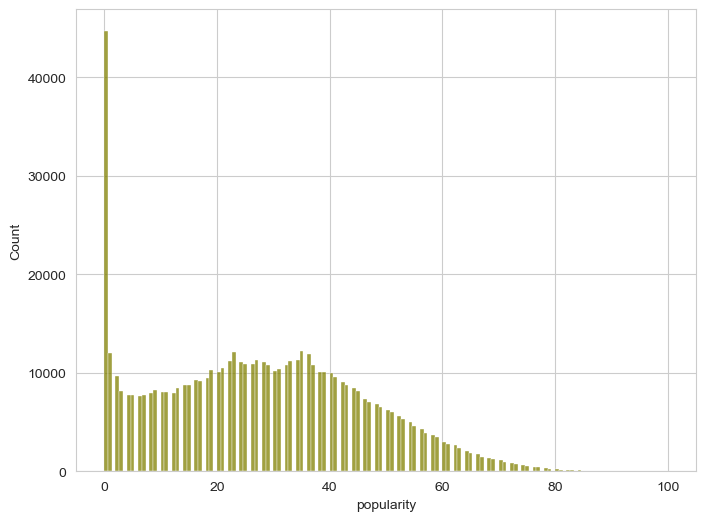

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(x='popularity',data=track,color="olive")

In [9]:
df = track[track['popularity']>85][['name','artists','popularity','year','time_signature']]
fig = px.scatter(df,x='year', y='popularity',color='name',size='time_signature')
fig.show()

### **Insights:**
>* there are a lot of songs with zero popularity(over 40,000)
>* there are very few songs with popularity greater than 80
>* songs with high popularity are very recent
>* the popularity of the songs was probably creaed by the current trend when the dataset was created

# **Correlation of Features**

<Axes: >

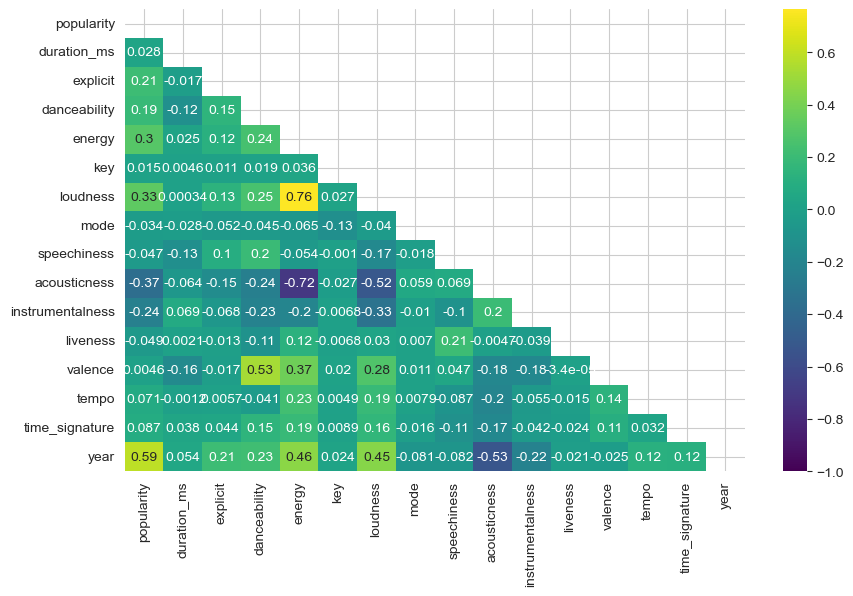

In [10]:
plt.figure(figsize=(10,6))

corr = track.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,vmin=-1,cmap='viridis',annot=True)

In [11]:
corr[abs(corr['popularity']) > 0.25]['popularity']

popularity      1.000000
energy          0.302315
loudness        0.327028
acousticness   -0.370882
year            0.590921
Name: popularity, dtype: float64

## **Insights:**
>* Energy, Loudness and Year are highly coreleated positively with Popularity
>* Acousticness is inversely corelated with Popularity

In [12]:
#yearby.head()

# **Dancebility**

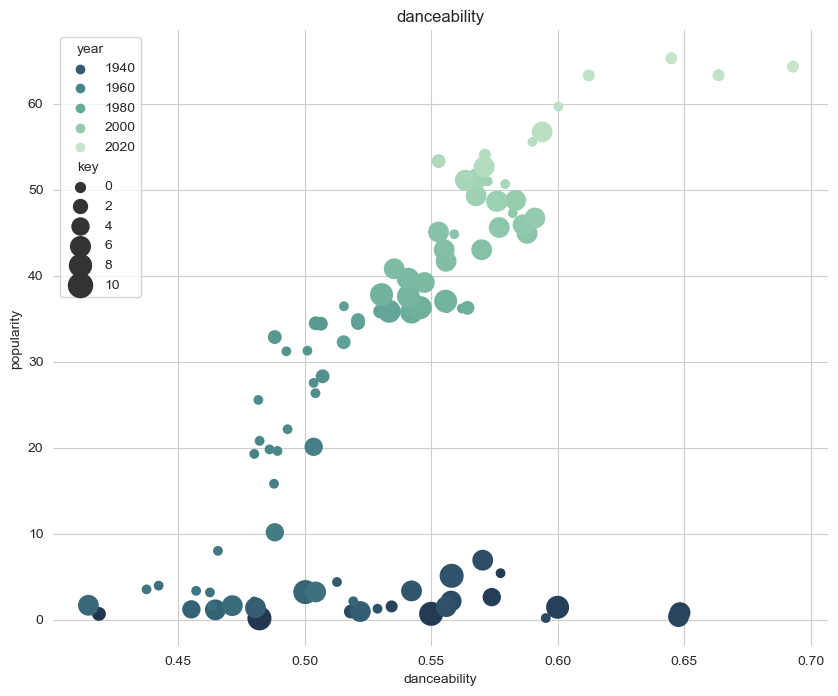

In [13]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.scatterplot(x="danceability", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.4,d=.2_r",
                sizes=(50, 300), linewidth=0,
                data=yearby,legend=True).set(title='danceability')
sns.despine(left = True,bottom=True)

# **Artists Popularity**

I have selected 5 random aritsts:
* Kendrick Lamar
* J. Cole
* Kanye West
* Drake
* Travis Scott

In [14]:
kl = dataset[dataset['artists'].str.contains('Kendrick Lamar')]
jc = dataset[dataset['artists'].str.contains('J. Cole')]
kw = dataset[dataset['artists'].str.contains('Kanye West')]
dra = dataset[dataset['artists'].str.contains('Drake')]
tvs = dataset[dataset['artists'].str.contains('Travis Scott')]

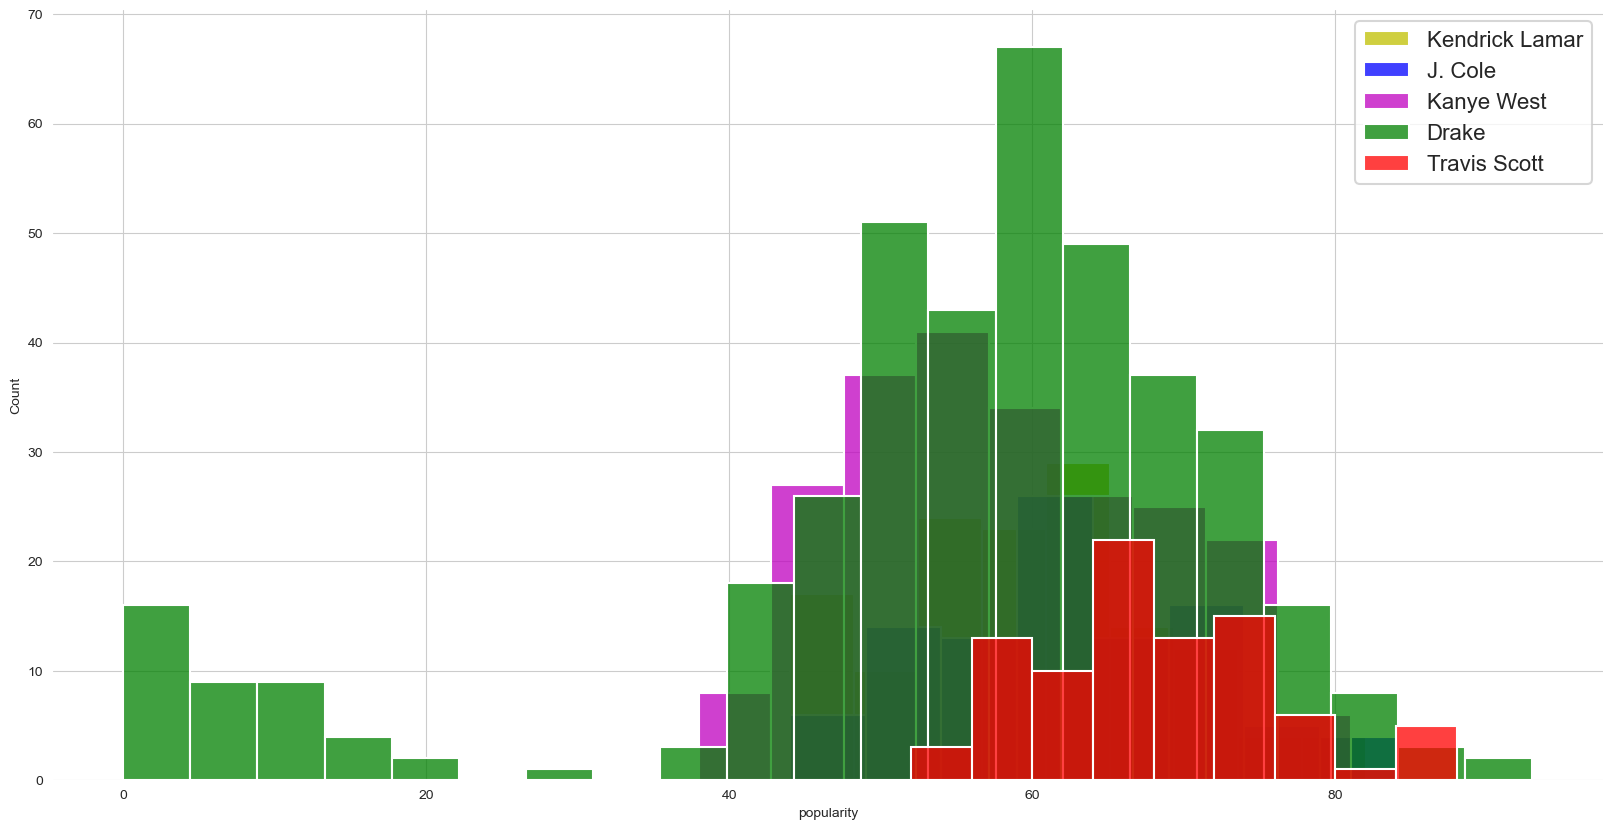

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("talk",font_scale=1, rc={"lines.linewidth": 2.5})

sns.histplot(kl['popularity'], color='y',label="Kendrick Lamar")
sns.histplot(jc['popularity'], color='b',label="J. Cole")
sns.histplot(kw['popularity'], color='m',label="Kanye West")
sns.histplot(dra['popularity'], color='g',label="Drake")
sns.histplot(tvs['popularity'], color='r',label="Travis Scott")

ax.legend(fontsize = 16)

**Drake has the highest popularity from these 5 artists**

# **Point Chart for various features against Popularity**

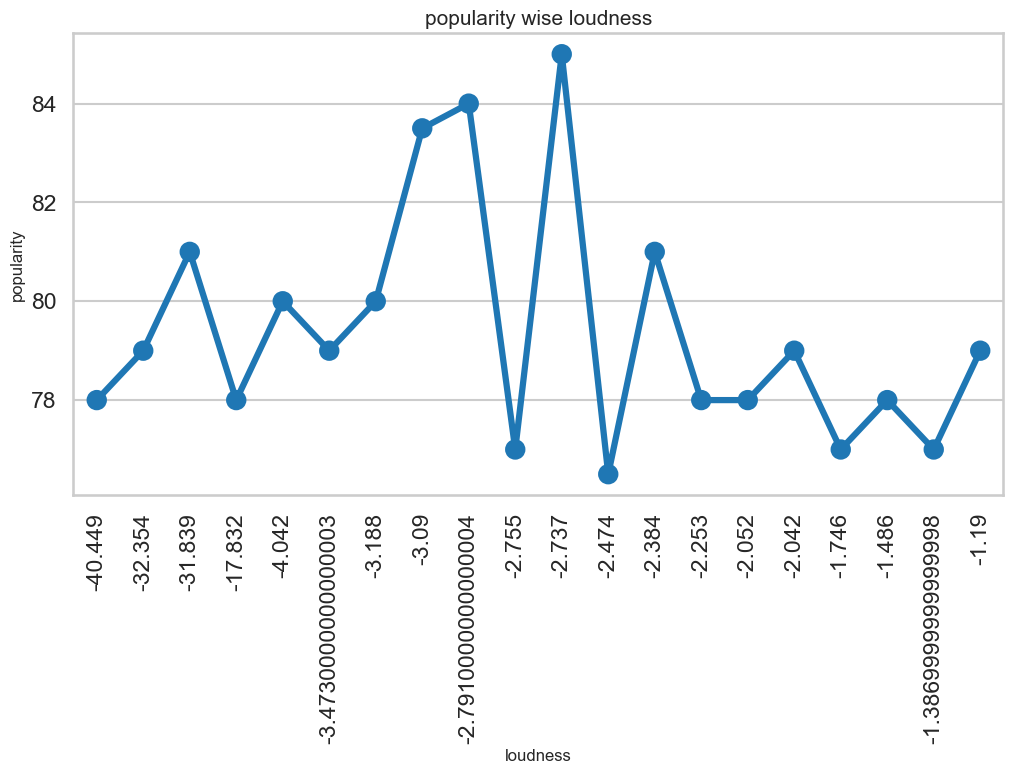

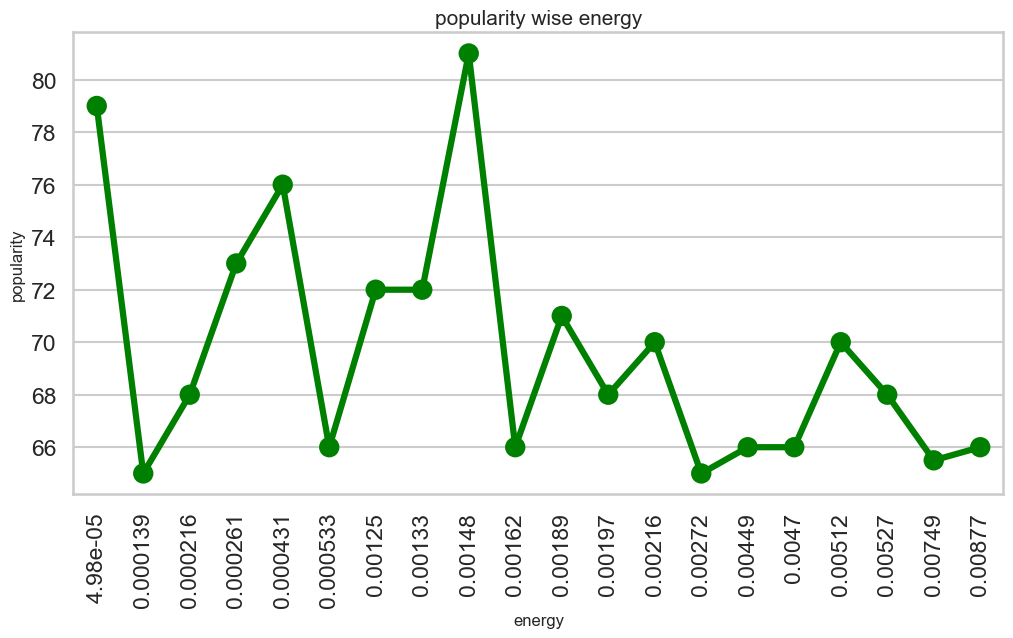

In [16]:
ld = dataset.groupby("loudness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()
ac = dataset.groupby("acousticness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()
en = dataset.groupby("energy")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()
ins = dataset.groupby("instrumentalness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()



plt.figure(figsize=(12,6))
sns.pointplot(data=ld,x="loudness", y='popularity')#,ax=axes[0])
#, color=color[4])
plt.xlabel('loudness', fontsize=12)
plt.ylabel('popularity', fontsize=12)
plt.title("popularity wise loudness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12,6))
sns.pointplot(data=en,x="energy", y='popularity',color='g')#,ax=axes[1])
#, color=color[4])
plt.xlabel('energy', fontsize=12)
plt.ylabel('popularity', fontsize=12)
plt.title("popularity wise energy", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


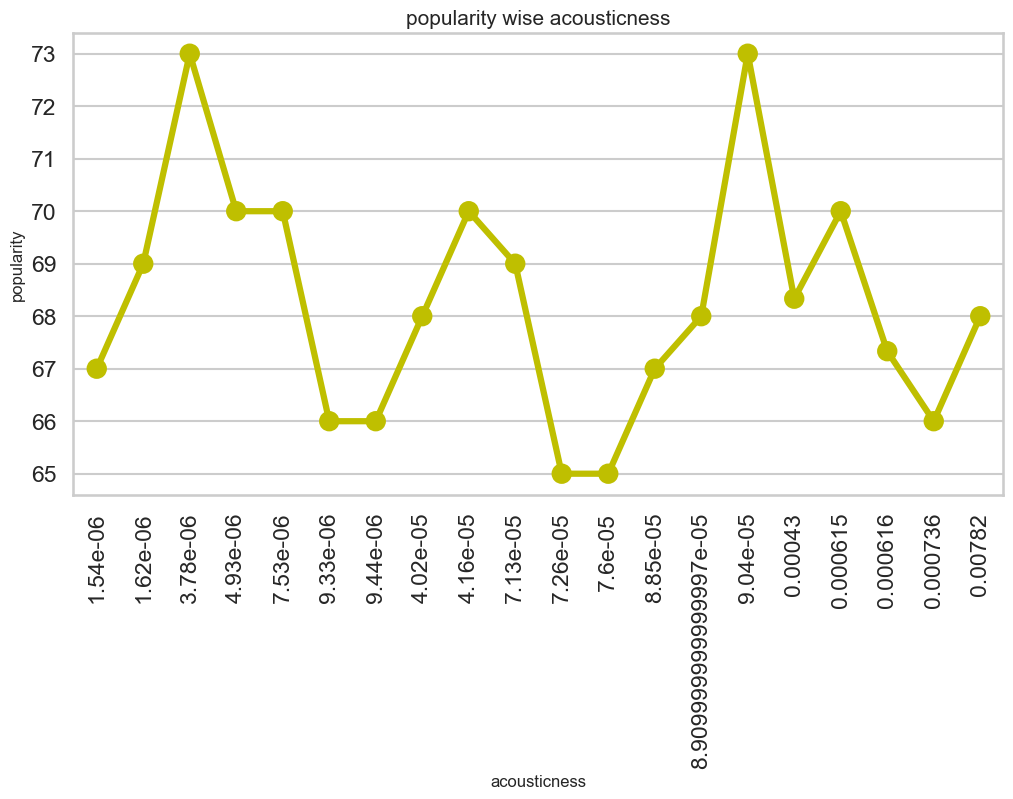

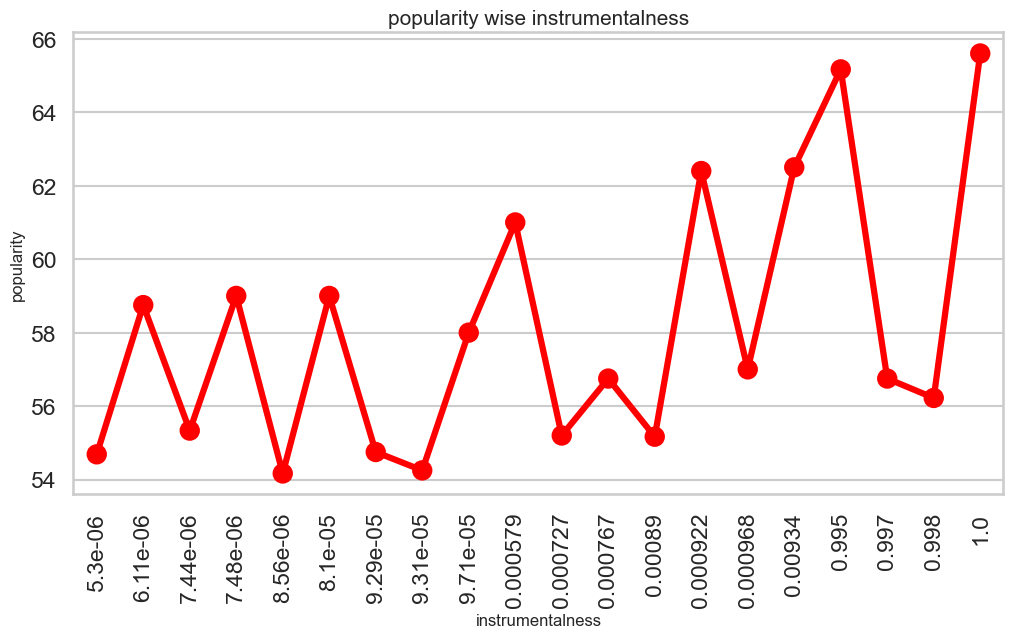

In [17]:
plt.figure(figsize=(12,6))
sns.pointplot(data=ac,x="acousticness", y='popularity',color='y')#,ax=axes[0])
#, color=color[4])
plt.xlabel('acousticness', fontsize=12)
plt.ylabel('popularity', fontsize=12)
plt.title("popularity wise acousticness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12,6))
sns.pointplot(data=ins,x="instrumentalness", y='popularity',color='r')#,ax=axes[0])
#, color=color[4])
plt.xlabel('instrumentalness', fontsize=12)
plt.ylabel('popularity', fontsize=12)
plt.title("popularity wise instrumentalness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# **Clustering Algorithms**

Clustering, also known as cluster analysis, is a machine learning task that involves grouping objects into clusters. The objects in the same cluster are more similar to each other than to those in other clusters. 
We will be trying out various clustering algorithms to fit out data into groups of cluster which will then be used by our ML model in the recommender system.

I tried 2 different Clustering techniques:

* **Kmeans**
* **MiniBatchKmeans**

In [18]:
df = dataset.select_dtypes(np.number)
number_cols = list(df.columns)

# **Standard Scaler**

Before Clustering our data, We need to scale down the features to to a given range so that the clustering algorithm dosen't favour a particular feature just because it has a greater value

We will be using Standard Scaler from the sci-kit learn library to scale down our data.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X = scaler.fit_transform(df.values)

scaled_df = pd.DataFrame(scaled_X,
columns=df.columns)

# **PCA - Principal Component Analysis**

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(scaled_df)

pca_df = pca.transform(scaled_df)

### Importing Metric Library 

In [21]:
from sklearn import metrics
dict1 = {}

# **Kmeans Clustering**

K-Means clustering is an unsupervised learning algorithm, which is used when you have unlabeled data. The aim of this algorithm is to find groups in the data. K-means clustering algorithm has many uses for grouping text documents, images, videos, and much more. It works iteratively to assign each data point to one of the groups based on the Euclidean distance.

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=8)

In [24]:
kmeans.fit(pca_df)

KMeans()

In [25]:
spotify_dataKmeans = dataset.copy()
spotify_dataKmeans['cluster_label'] = kmeans.predict(pca_df)

In [26]:
x = metrics.calinski_harabasz_score(pca_df, spotify_dataKmeans['cluster_label'])
print(x)
#kmeans
dict1['kmeans']=x

150784.9107130697


# **Mini-Batch Kmeans Clustering**

Mini Batch K-means algorithm‘s main idea is to use small random batches of data of a fixed size, so they can be stored in memory. Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence.

In [27]:
from sklearn.cluster import MiniBatchKMeans

In [28]:
minikmeans = MiniBatchKMeans(n_clusters=6,random_state=42,batch_size=32)

minikmeans.fit(pca_df)

MiniBatchKMeans(batch_size=32, n_clusters=6, random_state=42)

In [29]:
spotify_minikmeans = dataset.copy()
spotify_minikmeans['cluster_label'] = minikmeans.predict(pca_df)

In [30]:
x = metrics.calinski_harabasz_score(pca_df, spotify_minikmeans['cluster_label'])
print(x) #minibatch kmeans
dict1['minibatch kmeans']=x

123369.49172674381


# **Accuracy for these clustering algorithms**

We will be using the **Calinski Harabasz score** from **sklearn.metrics**

Calinski-Harabasz (CH) Index (introduced by Calinski and Harabasz in 1974) can be used to evaluate the model when ground truth labels are not known where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset. The CH Index (also known as Variance ratio criterion) is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

The **Higher** the score the **Better** the Result.

In [31]:
m = pd.DataFrame(list(dict1.items()),columns = ['cluster','score'])

In [32]:
m.set_index('cluster',inplace=True)
m

score
cluster                        
kmeans            150784.910713
minibatch kmeans  123369.491727

In [33]:
import plotly.express as px
fig = px.bar(m, orientation='h')
fig.show()

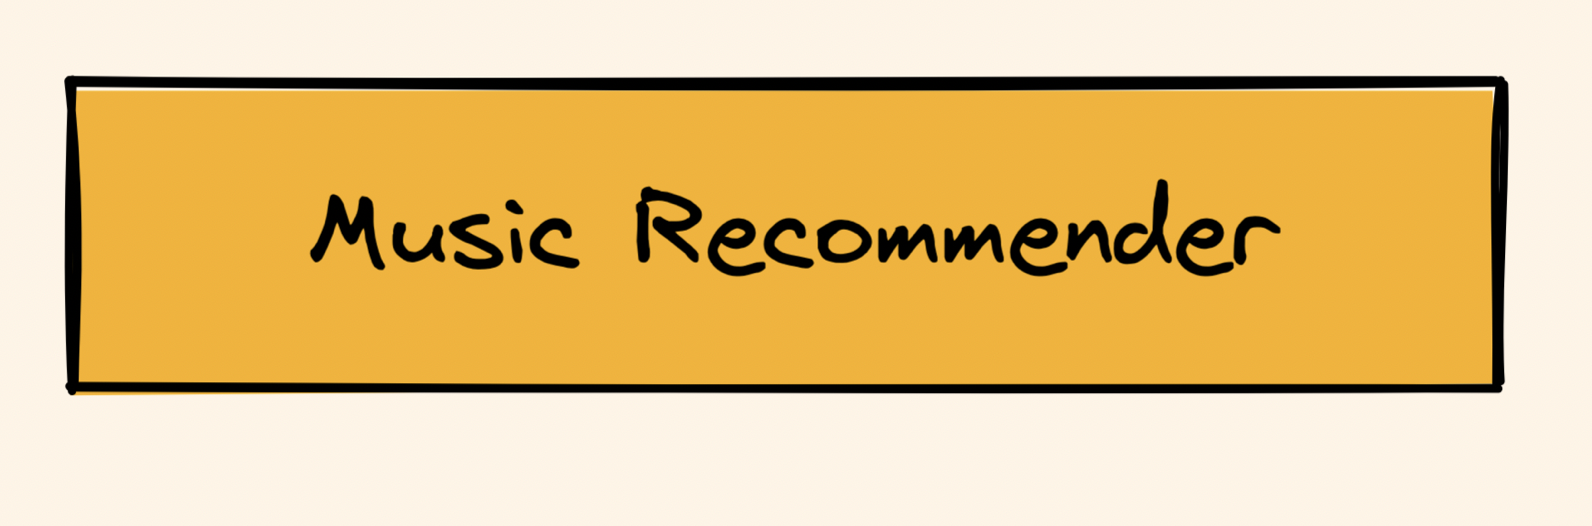

There are 2 major approaches for building recommendation systems — content-based and collaborative filtering. In the following section, I will discuss each one of them and when they are suitable.

>**Content based:**
>The gist of this approach is that we match users to the content or items they have liked or bought. Here the attributes of the users and the >products are important. For example, for movie recommendations, we use features such as director, actors, movie length, genre, etc. to find >similarity between movies.

>**Collaborative Filtering:**
>The underlying assumption of the collaborative filtering approach is that if A and B buy similar products, A is more likely to buy a product that >B has bought than a product which a random person has bought. Unlike content based, there are no features corresponding to users or items here.

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict

In [35]:
features = ['valence', 'year', 'acousticness',
            'danceability', 'duration_ms', 'energy',
            'explicit','instrumentalness', 'key', 
            'liveness', 'loudness', 'mode',
            'popularity','speechiness', 'tempo']

metadata_cols = ['year', 'name',  'artists']

In [36]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=8))],verbose=False)
X = dataset[features]
song_cluster_pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans())])

In [37]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

def tracks_groupby(song_list):
    # Convert the list of dictionaries to a Pandas DataFrame
    song_df = pd.DataFrame(song_list)

    # Group tracks by name and year (replace with actual column names)
    tracks_groupby_name_year = song_df.groupby(['name', 'year'])

    return tracks_groupby_name_year

def input_preprocessor(song_list, dataset, features):
    song_vectors = []

    for song in song_list:
        try:
            song_data = dataset[(dataset['name'] == song['name']) & 
                                (dataset['year'] == song['year'])].iloc[0]
        except IndexError:
            song_data = None

        if song_data is None:
            print('Warning: {} does not exist in our database'.format(song['name']))
            continue

        song_vectors.append(song_data[features].values)

    return np.mean(np.array(list(song_vectors)), axis=0)

def Music_Recommender(song_list, dataset, features, n_songs=10):
    # Group tracks by name and year (replace with actual column names)
    tracks_groupby_name_year = tracks_groupby(song_list)

    # You might want to decide how to use these grouped tracks in your recommendation process

    song_center = input_preprocessor(song_list, dataset, features)

    # Assuming you have a defined pipeline named song_cluster_pipeline
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(dataset[features])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))

    ed_dist = euclidean_distances(scaled_song_center, scaled_data)

    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = dataset.iloc[index]

    # Filter the columns to include only 'name', 'year', and 'artist_name'
    rec_output_filtered = rec_output[['year','name', 'artists']]

    return rec_output_filtered


In [53]:
YourRecommendations =Music_Recommender([{'name': 'Deja Vu', 'year': 2016},
                                          {'name': 'Starboy', 'year': 2016},
                                          {'name': 'DNA.', 'year': 2017}],dataset,features)
YourRecommendations

year                           name  \
19319   2018  Yacht Club (feat. Juice WRLD)   
108759  2020             House Arrest Tingz   
18814   2016                        Starboy   
19266   2018                     Fine China   
74670   2018                      Notice Me   
108496  2019                     Battle Cry   
18952   2016                       Reminder   
38012   2017               The Race - Remix   
57275   2020                 Emotional Torn   
38144   2018           Tribe (with J. Cole)   

                                     artists  
19319           ['Lil Yachty', 'Juice WRLD']  
108759        ['YoungBoy Never Broke Again']  
18814            ['The Weeknd', 'Daft Punk']  
19266               ['Future', 'Juice WRLD']  
74670               ['Migos', 'Post Malone']  
108496                            ['Polo G']  
18952                         ['The Weeknd']  
38012   ['Tay-K', '21 Savage', 'Young Nudy']  
57275         ['YoungBoy Never Broke Again']  
38144                     ['Bas', 'J. Cole']

In [59]:
def plotr(recommendations):
        # Adding a constant size for all bubbles
    recommendations['bubble_size'] = 10  

    fig = px.scatter(recommendations, x='year', y='name', size='bubble_size', text='name', title='Recommended Songs',
                     labels={'year': 'Year', 'name': 'Song Name'}, size_max=30, color='year', hover_data=['artists'])

    fig.update_traces(textposition='bottom center')
    fig.update_layout(yaxis=dict(categoryorder='total ascending'))

    fig.show()



In [60]:
plotr(YourRecommendations)